In [0]:
#package
import pandas as pd
import numpy as np

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
## Load data URL
df = pd.read_csv('/content/drive/My Drive/python/DST5-github/url_data.csv')
df.sample(n=25).head(10) 

,url,isMalicious
167243,joshdult.net/0ia6e4,1
28977,google.com/115386280968331157647/posts,0
433,corporationwiki.com/Florida/Sarasota/phil-yode...,0
113236,godreal.org/motoko/kusanagi.php,1
172842,auzonep.com.au/open-confirmonline/mail.htm?_pa...,1
178709,goo.cl/hZVGq,1
143573,update-my-account-info.com/Login,1
120838,realestatedoc.org/MNDS/MND,1
111609,kunden-0000x00-verifizierungs.com/475241/ger/n...,1
149103,ysgrp.com.cn/js?ref=http,1


In [24]:
import re
#find the url using IP
def using_ip(url):
    match = re.findall(r"\b\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}\b", url)
    if match:
        #print (match)
        return 1
    else:
        return -1
df['using_ip']=df['url'].apply(lambda x:using_ip(x))
df[['url','using_ip']]

,url,using_ip
0,songlyrics.com/news/riffd-the-shins-heartworms,-1
1,imaging-resource.com/PRODS/olympus-e-m1-ii/oly...,-1
2,gosugamers.net/lol/streams,-1
3,thingiverse.com/corkyzett/collections/intlwome...,-1
4,bausch.com/our-products/contact-lens-care/spec...,-1
...,...,...
194793,spawash.gr/uban/dropbox/proposal/index.php,-1
194794,formstack.com/forms/twtw13,-1
194795,rooferexpert.com/css/8933617-dosar-nr-18178420...,-1
194796,fc2.com/laygwvh8,-1


In [25]:
#Define whether the url is long
def long_url(url):
    if len(url)<54:
        return -1
    elif len(url) >= 54 and len(url) <= 75:
        return 0
    else:
        return 1

df['long_url']=df['url'].apply(lambda x:long_url(x))
df[['url','long_url']]

,url,long_url
0,songlyrics.com/news/riffd-the-shins-heartworms,-1
1,imaging-resource.com/PRODS/olympus-e-m1-ii/oly...,0
2,gosugamers.net/lol/streams,-1
3,thingiverse.com/corkyzett/collections/intlwome...,-1
4,bausch.com/our-products/contact-lens-care/spec...,0
...,...,...
194793,spawash.gr/uban/dropbox/proposal/index.php,-1
194794,formstack.com/forms/twtw13,-1
194795,rooferexpert.com/css/8933617-dosar-nr-18178420...,1
194796,fc2.com/laygwvh8,-1


In [26]:
#find the url using shortening services

def shortening_services(url):
    match=re.findall('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return -1
df['shortening_services']=df['url'].apply(lambda x:shortening_services(x))
df[['url','shortening_services']]

,url,shortening_services
0,songlyrics.com/news/riffd-the-shins-heartworms,-1
1,imaging-resource.com/PRODS/olympus-e-m1-ii/oly...,-1
2,gosugamers.net/lol/streams,-1
3,thingiverse.com/corkyzett/collections/intlwome...,-1
4,bausch.com/our-products/contact-lens-care/spec...,-1
...,...,...
194793,spawash.gr/uban/dropbox/proposal/index.php,-1
194794,formstack.com/forms/twtw13,-1
194795,rooferexpert.com/css/8933617-dosar-nr-18178420...,1
194796,fc2.com/laygwvh8,-1


In [27]:
#find whether url using @
def having_at(url):
    match = re.search('@', url)
    if match:
        return 1
    else:
        return -1
df['hav_@']=df['url'].apply(lambda x:having_at(x))
df[['url','hav_@']]

,url,hav_@
0,songlyrics.com/news/riffd-the-shins-heartworms,-1
1,imaging-resource.com/PRODS/olympus-e-m1-ii/oly...,-1
2,gosugamers.net/lol/streams,-1
3,thingiverse.com/corkyzett/collections/intlwome...,-1
4,bausch.com/our-products/contact-lens-care/spec...,-1
...,...,...
194793,spawash.gr/uban/dropbox/proposal/index.php,-1
194794,formstack.com/forms/twtw13,-1
194795,rooferexpert.com/css/8933617-dosar-nr-18178420...,1
194796,fc2.com/laygwvh8,-1


In [28]:
#find whether url using redirection
def redirecting_double_slash(url):
    try:
        list = [x.start(0) for x in re.finditer('//', url)]
        if list[len(list)-1] > 6:
            return 1
        else:
            return -1
    except:
        return 0
df['red_//']=df['url'].apply(lambda x:redirecting_double_slash(x))
df[['url','red_//']]

,url,red_//
0,songlyrics.com/news/riffd-the-shins-heartworms,0
1,imaging-resource.com/PRODS/olympus-e-m1-ii/oly...,0
2,gosugamers.net/lol/streams,0
3,thingiverse.com/corkyzett/collections/intlwome...,0
4,bausch.com/our-products/contact-lens-care/spec...,0
...,...,...
194793,spawash.gr/uban/dropbox/proposal/index.php,0
194794,formstack.com/forms/twtw13,0
194795,rooferexpert.com/css/8933617-dosar-nr-18178420...,0
194796,fc2.com/laygwvh8,0


In [29]:
#find whether url using subdomain
def sub_domains(url):
        url= str(url)
        if url.count('.') < 3:
            return 0
        elif url.count('.') == 3:
            return 2
        return 1
df['sub_domains']=df['url'].apply(lambda x:sub_domains(x))
df[['url','sub_domains']]

,url,sub_domains
0,songlyrics.com/news/riffd-the-shins-heartworms,0
1,imaging-resource.com/PRODS/olympus-e-m1-ii/oly...,0
2,gosugamers.net/lol/streams,0
3,thingiverse.com/corkyzett/collections/intlwome...,0
4,bausch.com/our-products/contact-lens-care/spec...,0
...,...,...
194793,spawash.gr/uban/dropbox/proposal/index.php,0
194794,formstack.com/forms/twtw13,0
194795,rooferexpert.com/css/8933617-dosar-nr-18178420...,1
194796,fc2.com/laygwvh8,0


In [30]:
#check the dataframe
df.head(-25)

,url,isMalicious,using_ip,long_url,shortening_services,hav_@,red_//,sub_domains
0,songlyrics.com/news/riffd-the-shins-heartworms,0,-1,-1,-1,-1,0,0
1,imaging-resource.com/PRODS/olympus-e-m1-ii/oly...,0,-1,0,-1,-1,0,0
2,gosugamers.net/lol/streams,0,-1,-1,-1,-1,0,0
3,thingiverse.com/corkyzett/collections/intlwome...,0,-1,-1,-1,-1,0,0
4,bausch.com/our-products/contact-lens-care/spec...,0,-1,0,-1,-1,0,0
...,...,...,...,...,...,...,...,...
194768,ibcalvario.com.br/gv6z8.exe,1,-1,-1,-1,-1,0,2
194769,kelownatownhomes.com/8g74crec,1,-1,-1,-1,-1,0,0
194770,esy.es/Recovery/active.htm,1,-1,-1,-1,-1,0,0
194771,polkcemetery.com/wallx/0116416dd970fdd1c37f89d...,1,-1,0,-1,-1,0,0


In [31]:
#check the url in order to test the package wordninja
df['url'][0]

'songlyrics.com/news/riffd-the-shins-heartworms'

In [32]:
!pip install wordninja 
#testing wordninja
import wordninja
wordninja.split(df['url'][0])

['song',
 'lyrics',
 'com',
 'news',
 'riff',
 'd',
 'the',
 'shins',
 'heart',
 'worms']

In [33]:
#define a function to count words appear in a URL
def count_url_word(url):
    count_word=0
    words=wordninja.split(url)
    for word in words:
        if len(word)>=3:
            count_word+=1
        else:
            continue
    return count_word

#test
count_url_word(df['url'][0])
            

9

In [34]:
#print the data frame with url and word count
df['word_count']=df['url'].apply(lambda x:count_url_word(x))
df[['url','word_count']]

,url,word_count
0,songlyrics.com/news/riffd-the-shins-heartworms,9
1,imaging-resource.com/PRODS/olympus-e-m1-ii/oly...,7
2,gosugamers.net/lol/streams,4
3,thingiverse.com/corkyzett/collections/intlwome...,8
4,bausch.com/our-products/contact-lens-care/spec...,12
...,...,...
194793,spawash.gr/uban/dropbox/proposal/index.php,7
194794,formstack.com/forms/twtw13,4
194795,rooferexpert.com/css/8933617-dosar-nr-18178420...,25
194796,fc2.com/laygwvh8,2


,url,word_count
0,songlyrics.com/news/riffd-the-shins-heartworms,9
1,imaging-resource.com/PRODS/olympus-e-m1-ii/oly...,7
2,gosugamers.net/lol/streams,4
3,thingiverse.com/corkyzett/collections/intlwome...,8
4,bausch.com/our-products/contact-lens-care/spec...,12
...,...,...
194793,spawash.gr/uban/dropbox/proposal/index.php,7
194794,formstack.com/forms/twtw13,4
194795,rooferexpert.com/css/8933617-dosar-nr-18178420...,25
194796,fc2.com/laygwvh8,2


In [35]:
#check the shape of data frame
df.shape

(194798, 9)

In [36]:
df.head(5)

,url,isMalicious,using_ip,long_url,shortening_services,hav_@,red_//,sub_domains,word_count
0,songlyrics.com/news/riffd-the-shins-heartworms,0,-1,-1,-1,-1,0,0,9
1,imaging-resource.com/PRODS/olympus-e-m1-ii/oly...,0,-1,0,-1,-1,0,0,7
2,gosugamers.net/lol/streams,0,-1,-1,-1,-1,0,0,4
3,thingiverse.com/corkyzett/collections/intlwome...,0,-1,-1,-1,-1,0,0,8
4,bausch.com/our-products/contact-lens-care/spec...,0,-1,0,-1,-1,0,0,12


In [0]:
#define the data after feature extraction in order to use neural network
col=['using_ip','long_url','shortening_services','hav_@','red_//','sub_domains','word_count']
X=df[col]
target=df['isMalicious']

In [0]:
from sklearn import model_selection

# Simple Cross-Validation: Split the data set into training and test data
X_train, X_test, target_train, target_test = model_selection.train_test_split(X, target, test_size=0.3, random_state=33)

In [0]:
#define a simple NN model
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(12, input_dim=7, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [0]:
#compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [57]:
from keras.callbacks import EarlyStopping

#define the early stopping point
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

# Training set automatically split 8/2 to check validation loss/accuracy at each epoch
history = model.fit(X_train, target_train, validation_split=0.2, epochs=500, batch_size=150,callbacks=[es])

Train on 109086 samples, validate on 27272 samples
Epoch 1/500
109086/109086 [==============================] - 1s 11us/step - loss: 0.6350 - acc: 0.6249 - val_loss: 0.6324 - val_acc: 0.6294
Epoch 2/500
109086/109086 [==============================] - 1s 11us/step - loss: 0.6349 - acc: 0.6245 - val_loss: 0.6321 - val_acc: 0.6294
Epoch 3/500
109086/109086 [==============================] - 1s 11us/step - loss: 0.6348 - acc: 0.6244 - val_loss: 0.6348 - val_acc: 0.6293
Epoch 4/500
109086/109086 [==============================] - 1s 11us/step - loss: 0.6350 - acc: 0.6236 - val_loss: 0.6325 - val_acc: 0.6293
Epoch 5/500
109086/109086 [==============================] - 1s 11us/step - loss: 0.6348 - acc: 0.6246 - val_loss: 0.6328 - val_acc: 0.6294
Epoch 6/500
109086/109086 [==============================] - 1s 11us/step - loss: 0.6348 - acc: 0.6249 - val_loss: 0.6314 - val_acc: 0.6295
Epoch 7/500
109086/109086 [==============================] - 1s 11us/step - loss: 0.6349 - acc: 0.6253 - val_

In [58]:
# list all data in history
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


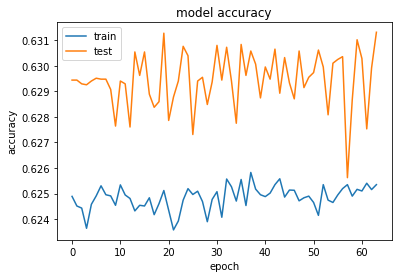

In [59]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

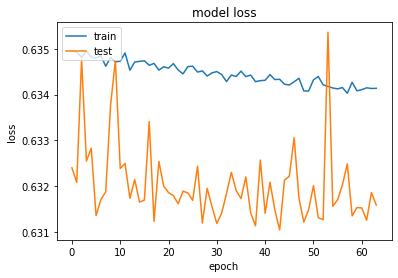

In [60]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()